# OSM GMSH Documentation
OSM GMSH is a mesh generation package using osm coastline for Marine Energy Resource Assessment Canada.

## OSM

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from osmgmsh import OSM

In [26]:
print(OSM.__doc__)


  OSM object prepares the osm coastline using spatial manipulation for gmsh, such as
  downloading,extracting,simplifying and resampling for gmsh.
  It also creates the mesh using gmsh.
  
  Parameters
  ----------
  obj:obj
    name:str,
    format:str,
    localFolder:path
    minDensity:float
    maxDensity:float
    shorelineGrowth:float
    limitFineDensity:float
    simplification:object
      a:
    defaultDomain:object
      a:
      b:
    input:object
      a:
      b:
    output:object
      a:
    pproj:str
    pgeo:str
    
  Note
  ----
  Any spatial manipulation is performed on the projected coordinate system.
  Results are converted back to geographic coordinates.
  
  Attributes
  ----------
  osm:zip, OSM fine resolution coastline
  sosm:zip, Simplified OSM resolution coastline
  domain: Polygon
    Model domain
  density:MultiPoint
    MultiPoint of the density
  
  


### Example 1

In [4]:
obj = {
      "name":"example1", 
      "format":"slf", 
      "localFolder":"../../data/example1",
      "minDensity":10,
      "maxDensity":10000,
      "shorelineGrowth":1.2,
      "simplification":{"isimplify":10,"buffer":1000,"fsimplify":10},
      "defaultDomain":{"center":[-63.553987,44.627934],"radius":60,"density":[[-63.553987,44.627934,10,1.2]]},
      
      "input":{
        "osm":"../../data/water-polygons-split-4326.zip",
        "sosm":"../../data/simplified-water-polygons-split-3857.zip",
      },
    }

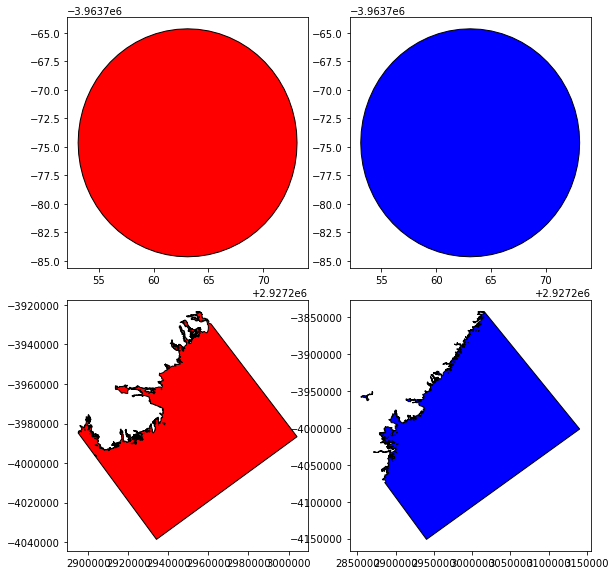

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
fig.tight_layout()

osm=OSM(obj)
osm.densityFineZone.proj.geometry.plot(axe=axes[0][0],polygonStyle={"facecolor":"red"})
osm.densityCoarseZone.proj.geometry.plot(axe=axes[0][1])
osm.osmFine.proj.geometry.plot(axe=axes[1][0],polygonStyle={"facecolor":"red"})
osm.osmCoarse.proj.geometry.plot(axe=axes[1][1])
pass

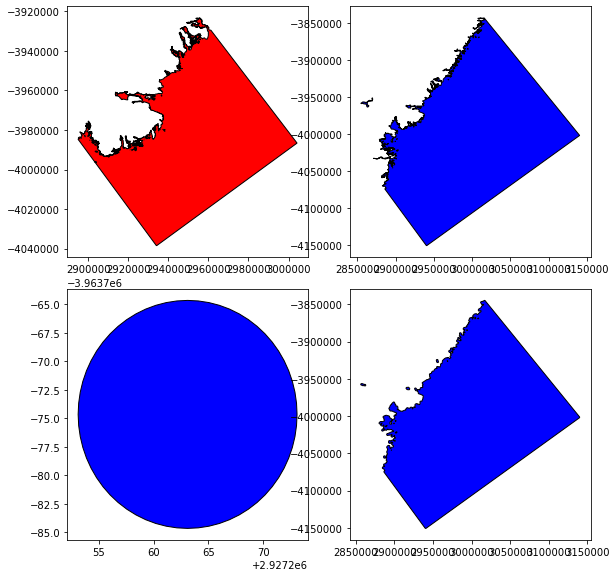

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
fig.tight_layout()
osm.osmFine.proj.geometry.plot(axe=axes[0][0],polygonStyle={"facecolor":"red"})
osm.osmCoarse.proj.geometry.plot(axe=axes[0][1])
osm.osmCoarseZone.proj.geometry.plot(axe=axes[1][0])
osm.osmCoarseS.proj.geometry.plot(axe=axes[1][1])
pass

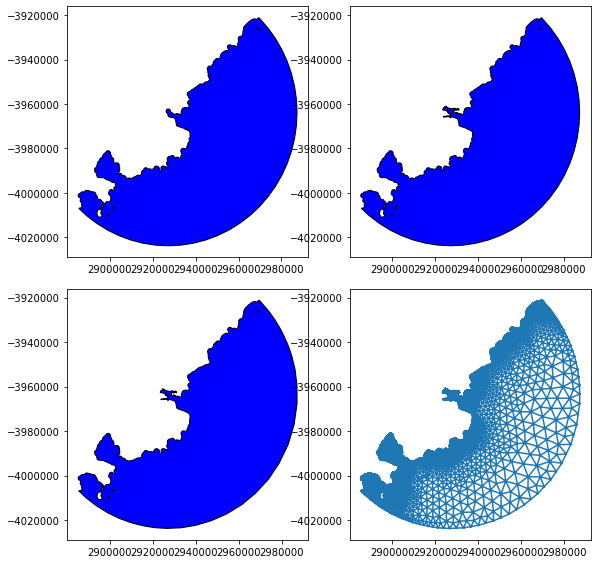

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
fig.tight_layout()
osm.osmDomain.proj.geometry.plot(axe=axes[0][0])
osm.osmSimplify.proj.geometry.plot(axe=axes[0][1])
osm.osmResample.proj.geometry.plot(axe=axes[1][0])
osm.osmMesh.proj.plot(axe=axes[1][1])
pass